In [123]:
from shapely.geometry import Polygon, box, LineString
def polygon(p):
    
    poly = list(map(float, p))
    xy =()
    for i in range(len(poly)):
        if(i%2 == 0):
            xy+= (((poly[i+1]),poly[i]), )
    return xy

In [164]:
### Landsat 
import csv 


with open(file_name) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count =0
    accq_start_dict= {'date' :[], 'tile':[], 'cloud':[], 'geometry': []}
    
    for row in csv_reader:
        if(line_count == 0):
            print(f'Column names are \n {", ".join(row)}')
            line_count += 1
            first_row = row[57:67]
        else:
            geo = row[57:67]  
            gg = polygon(geo)
            gg= gg[0:3] + (gg[4],) + (gg[3],)
            pp = Polygon(gg[1:])  
            accq_start_dict['date'].append(row[2])
            accq_start_dict['tile'].append(row[0][10:16])
            accq_start_dict['cloud'].append(row[17])
            accq_start_dict['geometry'].append(pp)
            

Column names are 
 Landsat Product Identifier, Landsat Scene Identifier, Acquisition Date, Collection Category, Collection Number, WRS Path, WRS Row, Target WRS Path, Target WRS Row, Nadir/Off Nadir, Roll Angle, Date L-1 Generated, Start Time, Stop Time, Station Identifier, Day/Night Indicator, Land Cloud Cover, Scene Cloud Cover, Ground Control Points Model, Ground Control Points Version, Geometric RMSE Model (meters), Geometric RMSE Model X, Geometric RMSE Model Y, Image Quality,  Processing Software Version, Sun Elevation L1, Sun Azimuth L1, TIRS SSM Model, Data Type Level-1, Sensor Identifier, Panchromatic Lines, Panchromatic Samples, Reflective Lines, Reflective Samples, Thermal Lines, Thermal Samples, Map Projection Level-1, UTM Zone, Datum, Ellipsoid, Grid Cell Size Panchromatic, Grid Cell Size Reflective, Grid Cell Size Thermal, Bias Parameter File Name OLI, Bias Parameter File Name TIRS,  Calibration Parameter File, RLUT File Name, Center Latitude, Center Longitude, UL Corner 

In [73]:
first_row

['Center Latitude dec',
 'Center Longitude dec',
 'UL Corner Lat dec',
 'UL Corner Long dec',
 'UR Corner Lat dec',
 'UR Corner Long dec',
 'LL Corner Lat dec',
 'LL Corner Long dec',
 'LR Corner Lat dec',
 'LR Corner Long dec']

In [158]:
print(geo)
gg = polygon(geo)
gg= gg[1:3] + (gg[4],) + (gg[3], )

['5.78559', '36.29366', '6.8137', '35.69009', '6.47774', '37.26534', '5.09131', '35.32442', '4.75807', '36.89523']


In [159]:
gg

((35.69009, 6.8137),
 (37.26534, 6.47774),
 (36.89523, 4.75807),
 (35.32442, 5.09131))

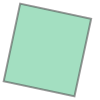

In [161]:
LineString(((36.29366, 5.78559),
 (35.69009, 6.8137),
 (35.32442, 5.09131),
 (36.89523, 4.75807),
 (37.26534, 6.47774),
 ))
Polygon(gg)

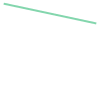

In [139]:
LineString(((35.69009, 6.8137),
 (37.26534, 6.47774)))

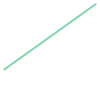

In [140]:
LineString(((37.26534, 6.47774),
 (35.32442, 5.09131)))

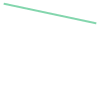

In [141]:
LineString(((35.32442, 5.09131),
 (36.89523, 4.75807)))

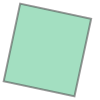

In [145]:
Polygon(((35.69009, 6.8137),
 (37.26534, 6.47774), (36.89523, 4.75807), (35.32442, 5.09131)
 ))

In [121]:
import csv 


with open('SENTINEL_2A_382286.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count =0
    accq_start_dict= {'date' :[], 'tile':[], 'cloud':[], 'geometry': []}
    
    for row in csv_reader:
        if(line_count == 0):
            print(f'Column names are \n {", ".join(row)}')
            line_count += 1
        else:
            geo = row[41:51]
            pp = Polygon(polygon(geo)[1:])
            accq_start_dict['date'].append(row[1][:10])
            accq_start_dict['tile'].append(row[3])
            accq_start_dict['cloud'].append(row[4])
            accq_start_dict['geometry'].append(pp)

Column names are 
 Entity ID, Acquisition Start Date, Acquisition End Date, Tile Number, Cloud Cover, Agency, Platform, Vendor, Vendor Tile ID, Orbit Number, Orbit Direction, Vendor Software Version, Production Date, Vendor Product ID, Archiving Center, Datatake Type, Datatake Identifier, Data Type, Product Type, Product Format, Processing Level, Datastrip ID, Datum, Map Projection, UTM Zone, EPSG Code, Resolution, Units, Sun Zenith Angle Mean, Sun Azimuth Angle  Mean, Quantification, Center Latitude, Center Longitude, NW Corner Lat, NW Corner Long, NE  Corner Lat, NE  Corner Long, SE Corner Lat, SE Corner Long, SW Corner Lat, SW Corner Long, Center Latitude dec, Center Longitude dec, NW  Corner Lat dec, NW Corner Long dec, NE Corner Lat dec, NE Corner Long dec, SE Corner Lat dec, SE Corner Long dec, SW Corner Lat dec, SW Corner Long dec, Display ID, Ordering ID, Browse Link


In [165]:
geo

['5.78559',
 '36.29366',
 '6.8137',
 '35.69009',
 '6.47774',
 '37.26534',
 '5.09131',
 '35.32442',
 '4.75807',
 '36.89523']

In [166]:
# Converting the dictionary to dataframe 
import pandas as pd

df = pd.DataFrame(data=accq_start_dict)

In [167]:
# the resulting dataframe 
df

,date,tile,cloud,geometry
0,2020/01/01,170050,0,"POLYGON ((36.76975 15.50145, 38.50187 15.13857..."
1,2020/01/01,170051,0.39,"POLYGON ((36.45514 14.05711, 38.17508 13.69532..."
2,2020/01/01,170052,0.13,"POLYGON ((36.14262 12.61215, 37.85161 12.25132..."
3,2020/01/01,170053,0.01,"POLYGON ((35.83141 11.16678, 37.53144 10.80667..."
4,2020/01/01,170054,2.28,"POLYGON ((35.52199 9.721439999999999, 37.21379..."
...,...,...,...,...
10237,2013/03/10,169052,-1,"POLYGON ((36.92639 12.59554, 38.53268 12.25671..."
10238,2013/03/10,169053,-1,"POLYGON ((36.61577 11.15002, 38.21164 10.81226..."
10239,2013/03/10,169054,-1,"POLYGON ((36.30649 9.7051, 37.8937 9.368180000..."
10240,2013/03/10,169055,-1,"POLYGON ((35.99804 8.259069999999999, 37.57814..."


In [168]:
# Checking the type of geometry and date column
from pandas.api.types import is_string_dtype
print(is_string_dtype(df['geometry']))
print(is_string_dtype(df['date']))

True
True


In [169]:
# Converting date column to datetime and cloud column to float
df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d")
df['cloud'] = df['cloud'].astype(float)

In [170]:
# Creating a month and year column 
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

In [171]:
df

,date,tile,cloud,geometry,month,year
0,2020-01-01,170050,0.00,"POLYGON ((36.76975 15.50145, 38.50187 15.13857...",1,2020
1,2020-01-01,170051,0.39,"POLYGON ((36.45514 14.05711, 38.17508 13.69532...",1,2020
2,2020-01-01,170052,0.13,"POLYGON ((36.14262 12.61215, 37.85161 12.25132...",1,2020
3,2020-01-01,170053,0.01,"POLYGON ((35.83141 11.16678, 37.53144 10.80667...",1,2020
4,2020-01-01,170054,2.28,"POLYGON ((35.52199 9.721439999999999, 37.21379...",1,2020
...,...,...,...,...,...,...
10237,2013-03-10,169052,-1.00,"POLYGON ((36.92639 12.59554, 38.53268 12.25671...",3,2013
10238,2013-03-10,169053,-1.00,"POLYGON ((36.61577 11.15002, 38.21164 10.81226...",3,2013
10239,2013-03-10,169054,-1.00,"POLYGON ((36.30649 9.7051, 37.8937 9.368180000...",3,2013
10240,2013-03-10,169055,-1.00,"POLYGON ((35.99804 8.259069999999999, 37.57814...",3,2013


In [172]:
from shapely import wkt
import geopandas as gdp
# fig = plt.figure()
# fig.subplots_adjust(hspace=3, wspace=2)
months = [0] * 12
for i in range(1, 13):
    m = df.loc[(df['month'] == i) & (df['year'] == 2018)]
    m['geometry'] = m['geometry'].astype(str)
    m = m.groupby(['tile', 'geometry'])['cloud'].mean().to_frame().reset_index()
    m['geometry'] = m['geometry'].apply(wkt.loads)
    m = gdp.GeoDataFrame(m.drop(['geometry'], axis=1), crs={'init': 'epsg:4326'}, geometry=m.geometry)
    months[i-1] = m
    

/home/kal/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [173]:
jan = months[0]

In [174]:
type(jan)

geopandas.geodataframe.GeoDataFrame

In [175]:
import folium 

nReserve = gdp.read_file('ethiopia.geojson')

m = folium.Map([9.12, 39.25], zoom_start=4)
folium.GeoJson(nReserve).add_to(m)
m
import matplotlib.pyplot as plt

for i in nReserve['geometry']:
    foot = i

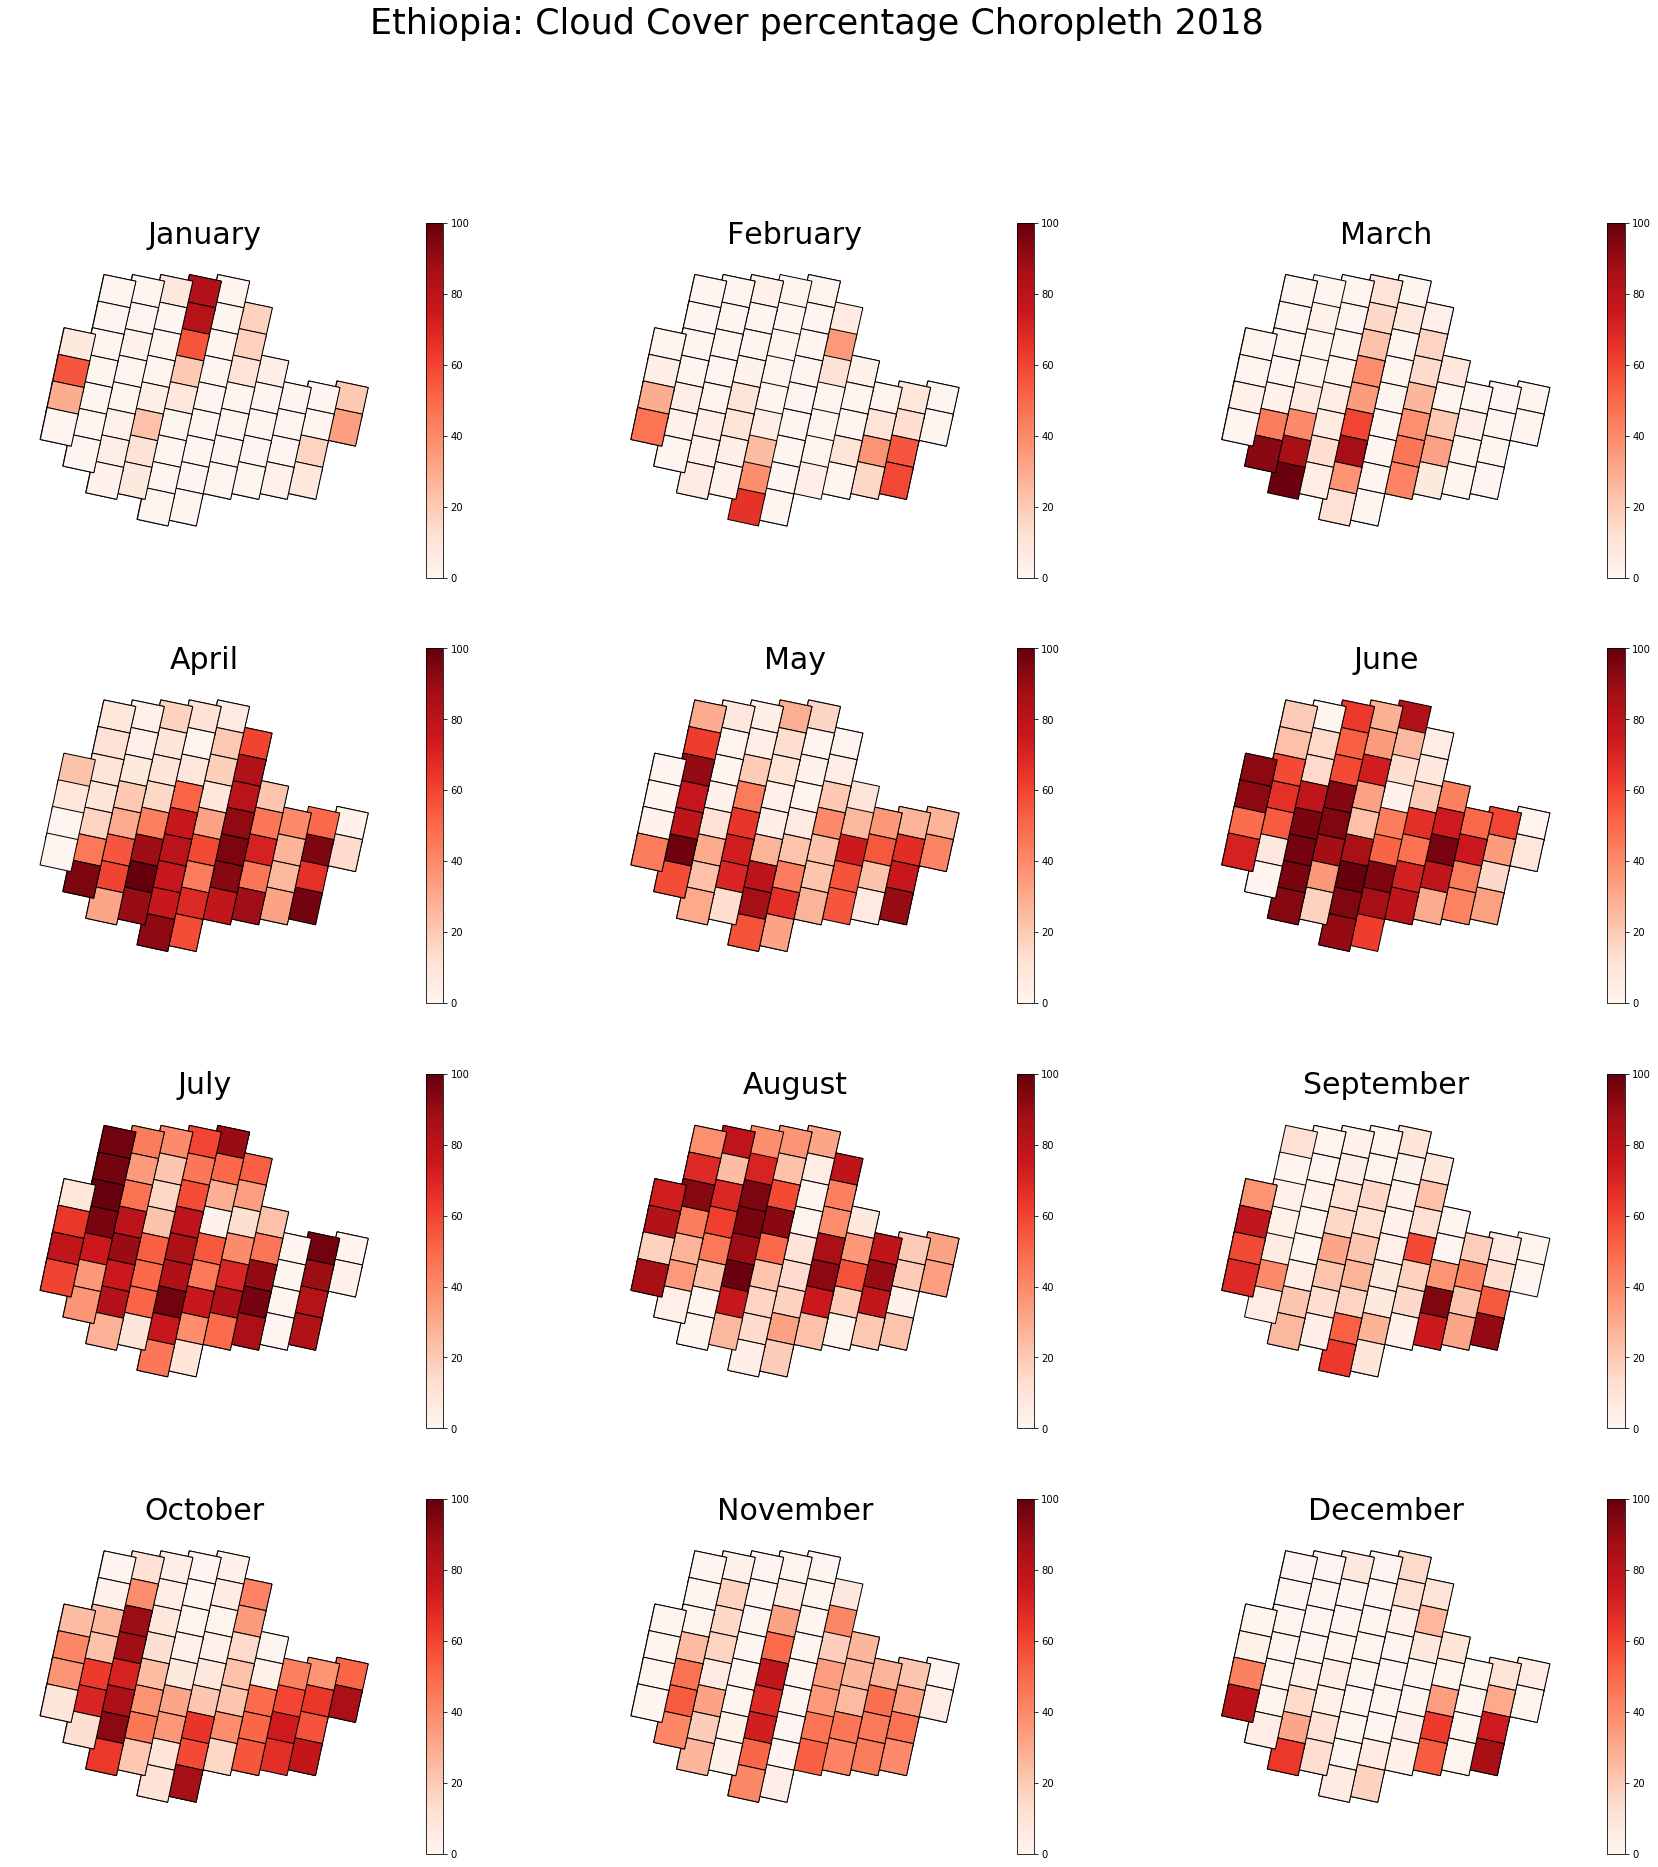

In [176]:
import geoplot
import matplotlib as mpl
import matplotlib.pyplot as plt

norm = mpl.colors.Normalize(vmin=0, vmax=100)
cmap = mpl.cm.ScalarMappable(norm=norm, cmap='Reds').cmap

fig, axarr = plt.subplots(4, 3, figsize=(30, 30))
mon_name = ['January', 'February', 'March',
            'April', 'May', 'June', 'July', 
            'August', 'September', 'October', 'November', 'December' ]

fig.suptitle("Ethiopia: Cloud Cover percentage Choropleth 2018", fontsize=35)

for i in range(12):
    x = (i) // 3
    y = (i) % 3
    geoplot.choropleth(
        months[i], hue= months[i]['cloud'],
        cmap=cmap, norm=norm, legend=True, ax=axarr[x, y]
    ) 
    axarr[x, y].set_title(mon_name[i], fontsize=30)
    
#     plt.plot(*foot.exterior.xy, color='red')

In [29]:
fig.savefig("cloud_coverage_2018", dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait')